# Terminologies

- training set, validation set, test set

<CR>

- Underfitting vs. Overfitting

<CR>

- Bias-Variance Tradeoff

<CR>

- Cross-Validation, stratified Cross-Validation

<CR>

# Further Topics


- Regularization, Pruning, Normalization, Early stopping


<CR>

- Bagging, Boosting, Stacking, Ensemble

# Question to be answered

- How do we let a maching learning model to learn? How do we generalize the model?

<CR>

- What is the model complexity? What happens if it is too simple and too complicated for given data?

<CR>

- How do we find the best model complexity?

<CR>

# Further Topics

- How do we prevent to build too complicated models for regression, decision trees and neural networks?

<CR>
    
- How do we mix models to handle the model complexity?

# Data Split

- How can our machine learning model 'learn'?

<CR>

- Can we assume that the real-world data look exactly the same as our training set?

<CR>
    
- How do we do model selection or hyper-parameter selection? Can we do it based on the accuracy on our training set?

<CR>

- Discuss:
   - what are the differences between the training set, validation data, test data? 

# Model Complexity

$ \textrm{Expected squared error} = \textrm{Bias}^2 + \textrm{Model Variance} + \text{Variance of Noises} $

![](biasvariance.png)

# An Example: Underfitting, Overfitting 

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

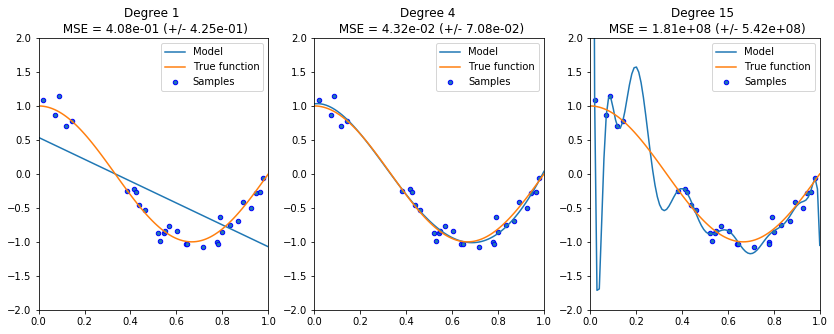

In [8]:
plt.figure(figsize=(14, 5))
for i, d in enumerate(degrees):
    plt.subplot(1, len(degrees), i + 1)
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring='neg_mean_squared_error', cv=10)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    plt.title('Degree {deg} \n MSE = {mean:.2e} (+/- {std:.2e})'.format(
                  deg=d, mean=-scores.mean(), std=scores.std()))    

# Training and Validation Curves 

![](underfit_1.png) 

# Training and Validation Curves 

![](overfit.png)

# Cross Validation
![](crossvalidation.png)

In [7]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(n_splits=3)
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0.3 0.4 0.5 0.6], test: [0.1 0.2]
train: [0.1 0.2 0.5 0.6], test: [0.3 0.4]
train: [0.1 0.2 0.3 0.4], test: [0.5 0.6]


# Stratified Cross Validation
![](stratifiedkfold.png)

In [4]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("train: %s test: %s" % (train, test))

train: [2 3 6 7 8 9] test: [0 1 4 5]
train: [0 1 3 4 5 8 9] test: [2 6 7]
train: [0 1 2 4 5 6 7] test: [3 8 9]


# Avoiding Overfitting 

- Regularization for Regression

<CR>

- Pruning for Decision Trees

<CR>
    
- Normalization (Regularization) and Early Stopping for Neural Network


# Regularization for Regression

$ \textrm{Residual Sum of Squares} = \sum_i (\textrm{observed value}_i - \textrm{predicted value of model}_i) ^2 )$

<CR>

To minimize $RSS + \textrm{penalizer}$

<CR>

- ridge : penalizer = the sum of squared coefficients 

<CR>

- lasso : penalizer = the sum of absolute values of coefficients

<CR>

- elastic net : linear sum of ridge and lasso

# Pruning for Decision Trees

![](pruning_tree.jpeg)

# Normalization (Regularization) and Early Stopping for Neural Network

<CR>
    
- Early Stopping

<CR>

- Dropout, Skipping connection

<CR>
    
- Batch Normalization, Layer Normalization, Weight Normalization

<CR>
    
- Instance, Group Normalization

# Ensemble - Wisdom of Crowds
- Bagging (Bootstrap Aggregation)

<CR>

- Boosting

<CR>
    
- Stacking


# Bagging

![](bagging.jpeg)

# Boosting

![](boosting.png)

# Stacking

![](stacking.png)

# Good to know: No Free Lunch Theorem

(simplified) no one model that works best for every problem